# This notebook will go through integrating/concatenating datasets and basic annotations including cell typing.

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/Lecture5_Annotation_Integration.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of Packages

In [1]:
!pip install matplotlib==3.7.5
#==3.6.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.


In [2]:
!pip install scanpy==1.10.1
!pip install pandas==2.2.2
!pip install numpy==1.26.4

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=678658e48eb643bc16fea2caa8f6b830162c4305b31da09d10f73529052431ae
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [3]:
!pip install setuptools==65.5.0 wheel==0.38.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.45.1
    Uninstalling wheel-0.45.1:
      Successfully uninstalled wheel-0.45.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [4]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 17.6 MB/s eta 0:00:00


In [5]:
!pip install anndata

In [6]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.4 MB/s eta 0:00:00


In [7]:
!git clone https://github.com/Ken-Lau-Lab/single-cell-lectures  # for Colab users

Cloning into 'single-cell-lectures'...
remote: Enumerating objects: 429, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 429 (delta 21), reused 18 (delta 7), pack-reused 392 (from 1)
Receiving objects: 100% (429/429), 206.60 MiB | 14.70 MiB/s, done.
Resolving deltas: 100% (230/230), done.
Updating files: 100% (33/33), done.


## Import packages

In [8]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import anndata as ad

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

In [9]:
! curl -O -J -L https://www.dropbox.com/scl/fi/7oh25h3oel67yiuhyc308/L5_Dataset2_v2.h5ad?rlkey=mmn4ivhhe8qe41c56hu7nvbkn&st=7j7zqej8&dl=0
dat_2 = sc.read_h5ad('L5_Dataset2_v2.h5ad')
! curl -O -J -L https://www.dropbox.com/scl/fi/2hyr2p28qhicqtkxr2ma9/L5_Dataset1_v2.h5ad?rlkey=gx6r5hqv46zfbop3m496eftjn&st=ue9m95lh&dl=0
dat_1 = sc.read_h5ad('L5_Dataset1_v2.h5ad')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     13      0  0:00:01  0:00:01 --:--:--    13
100   491    0   491    0     0    240      0 --:--:--  0:00:02 --:--:--     0
100 15.7M  100 15.7M    0     0  6740k      0  0:00:02  0:00:02 --:--:-- 6740k


/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     16      0  0:00:01  0:00:01 --:--:--    16
100   491    0   491    0     0    345      0 --:--:--  0:00:01 --:--:--   345
100 14.8M  100 14.8M    0     0  8143k      0  0:00:01  0:00:01 --:--:-- 8143k


/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [10]:
dat_1


AnnData object with n_obs × n_vars = 2335 × 29577
    var: 'ENSG_ID'

In [11]:
dat_2


AnnData object with n_obs × n_vars = 2200 × 29577
    var: 'ENSG_ID'

In [12]:
dat_1.var_names_make_unique()
dat_2.var_names_make_unique()


In [13]:
dat_1_2_new = ad.concat([dat_1, dat_2], join='inner', label='Dataset_pick', keys= ['dat_1', 'dat_2'])

# dat_combo_inner = ad.concat([dat1, dat2], join = 'inner', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [14]:
dat_1_2_new


AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_pick'

In [16]:
def normalization( dat_1_2_new):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dat_1_2_new)
    dat_1_2_new.X = np.arcsinh(dat_1_2_new.X).copy()
    dat_1_2_new.layers['arcsinh'] = dat_1_2_new.X.copy()
    sc.pp.scale(dat_1_2_new)

    return dat_1_2_new
dat_1_2_new.raw = dat_1_2_new.copy()

normalization(dat_1_2_new)



AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_pick'
    var: 'mean', 'std'
    layers: 'arcsinh'

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
<ipython-input-17-9c09ea28d18c>:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden( dat_1_2_new, resolution = 0.7)


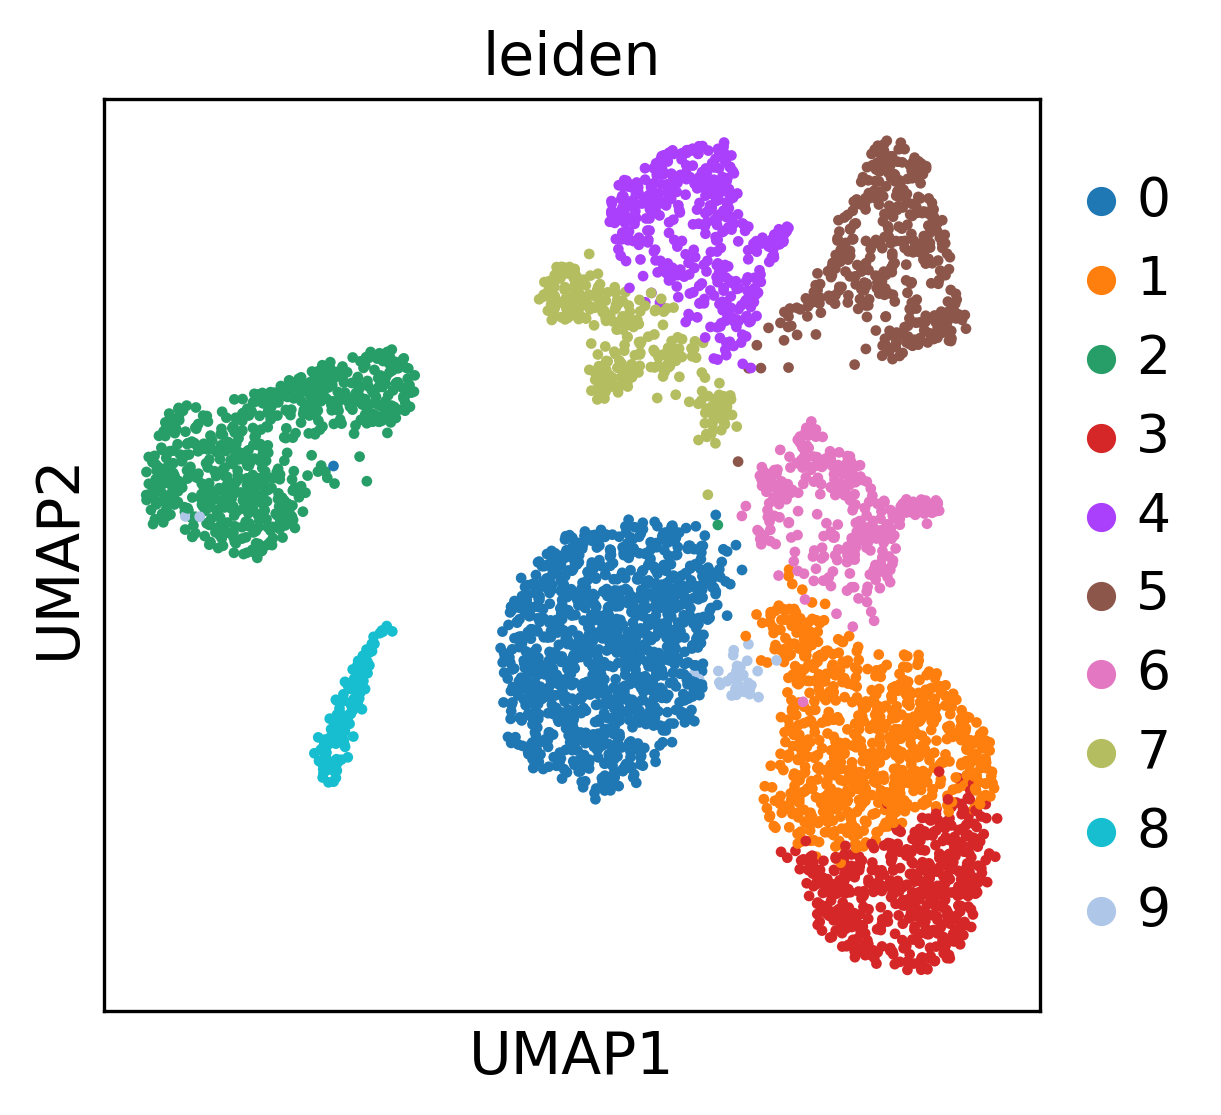

In [17]:
n_neighbors = int( np.sqrt(dat_1_2_new.n_obs) ) # an optimal number for k in KNN
sc.tl.pca(dat_1_2_new, return_info=False, use_highly_variable = False ) #PCA
sc.pp.neighbors( dat_1_2_new, n_neighbors= n_neighbors , n_pcs=50, ) # make neighborhood graph
sc.tl.umap(dat_1_2_new, random_state=0) # make UMAP
sc.tl.leiden( dat_1_2_new, resolution = 0.7)
sc.set_figure_params(figsize=[4,4], dpi = 150)
sc.pl.umap( dat_1_2_new, color = ['leiden'])


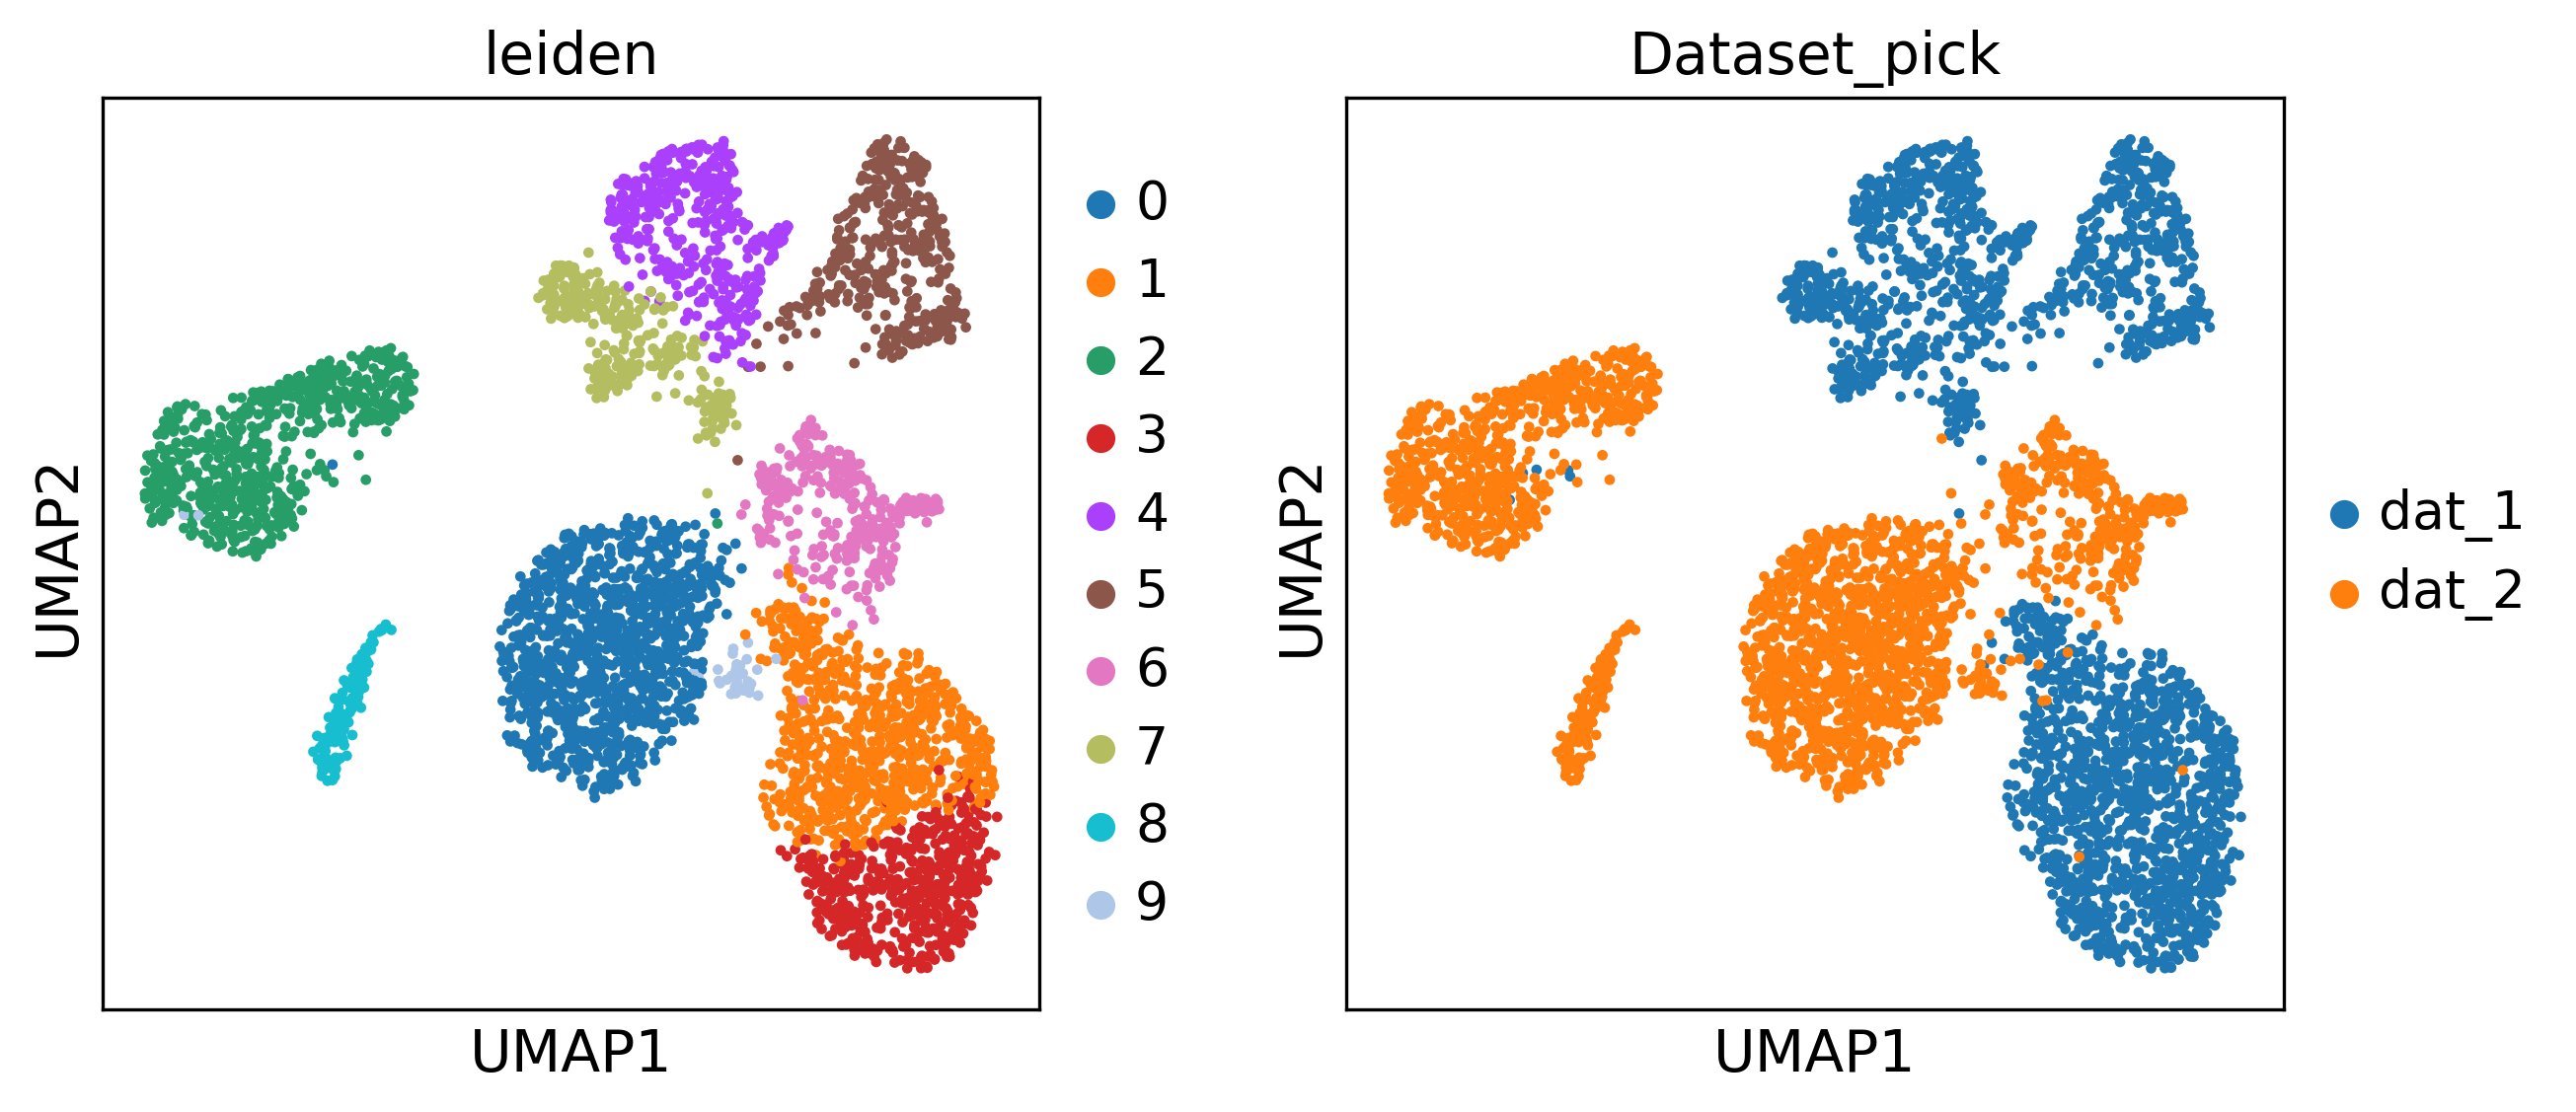

In [19]:
sc.pl.umap( dat_1_2_new, color = ['leiden', 'Dataset_pick'])


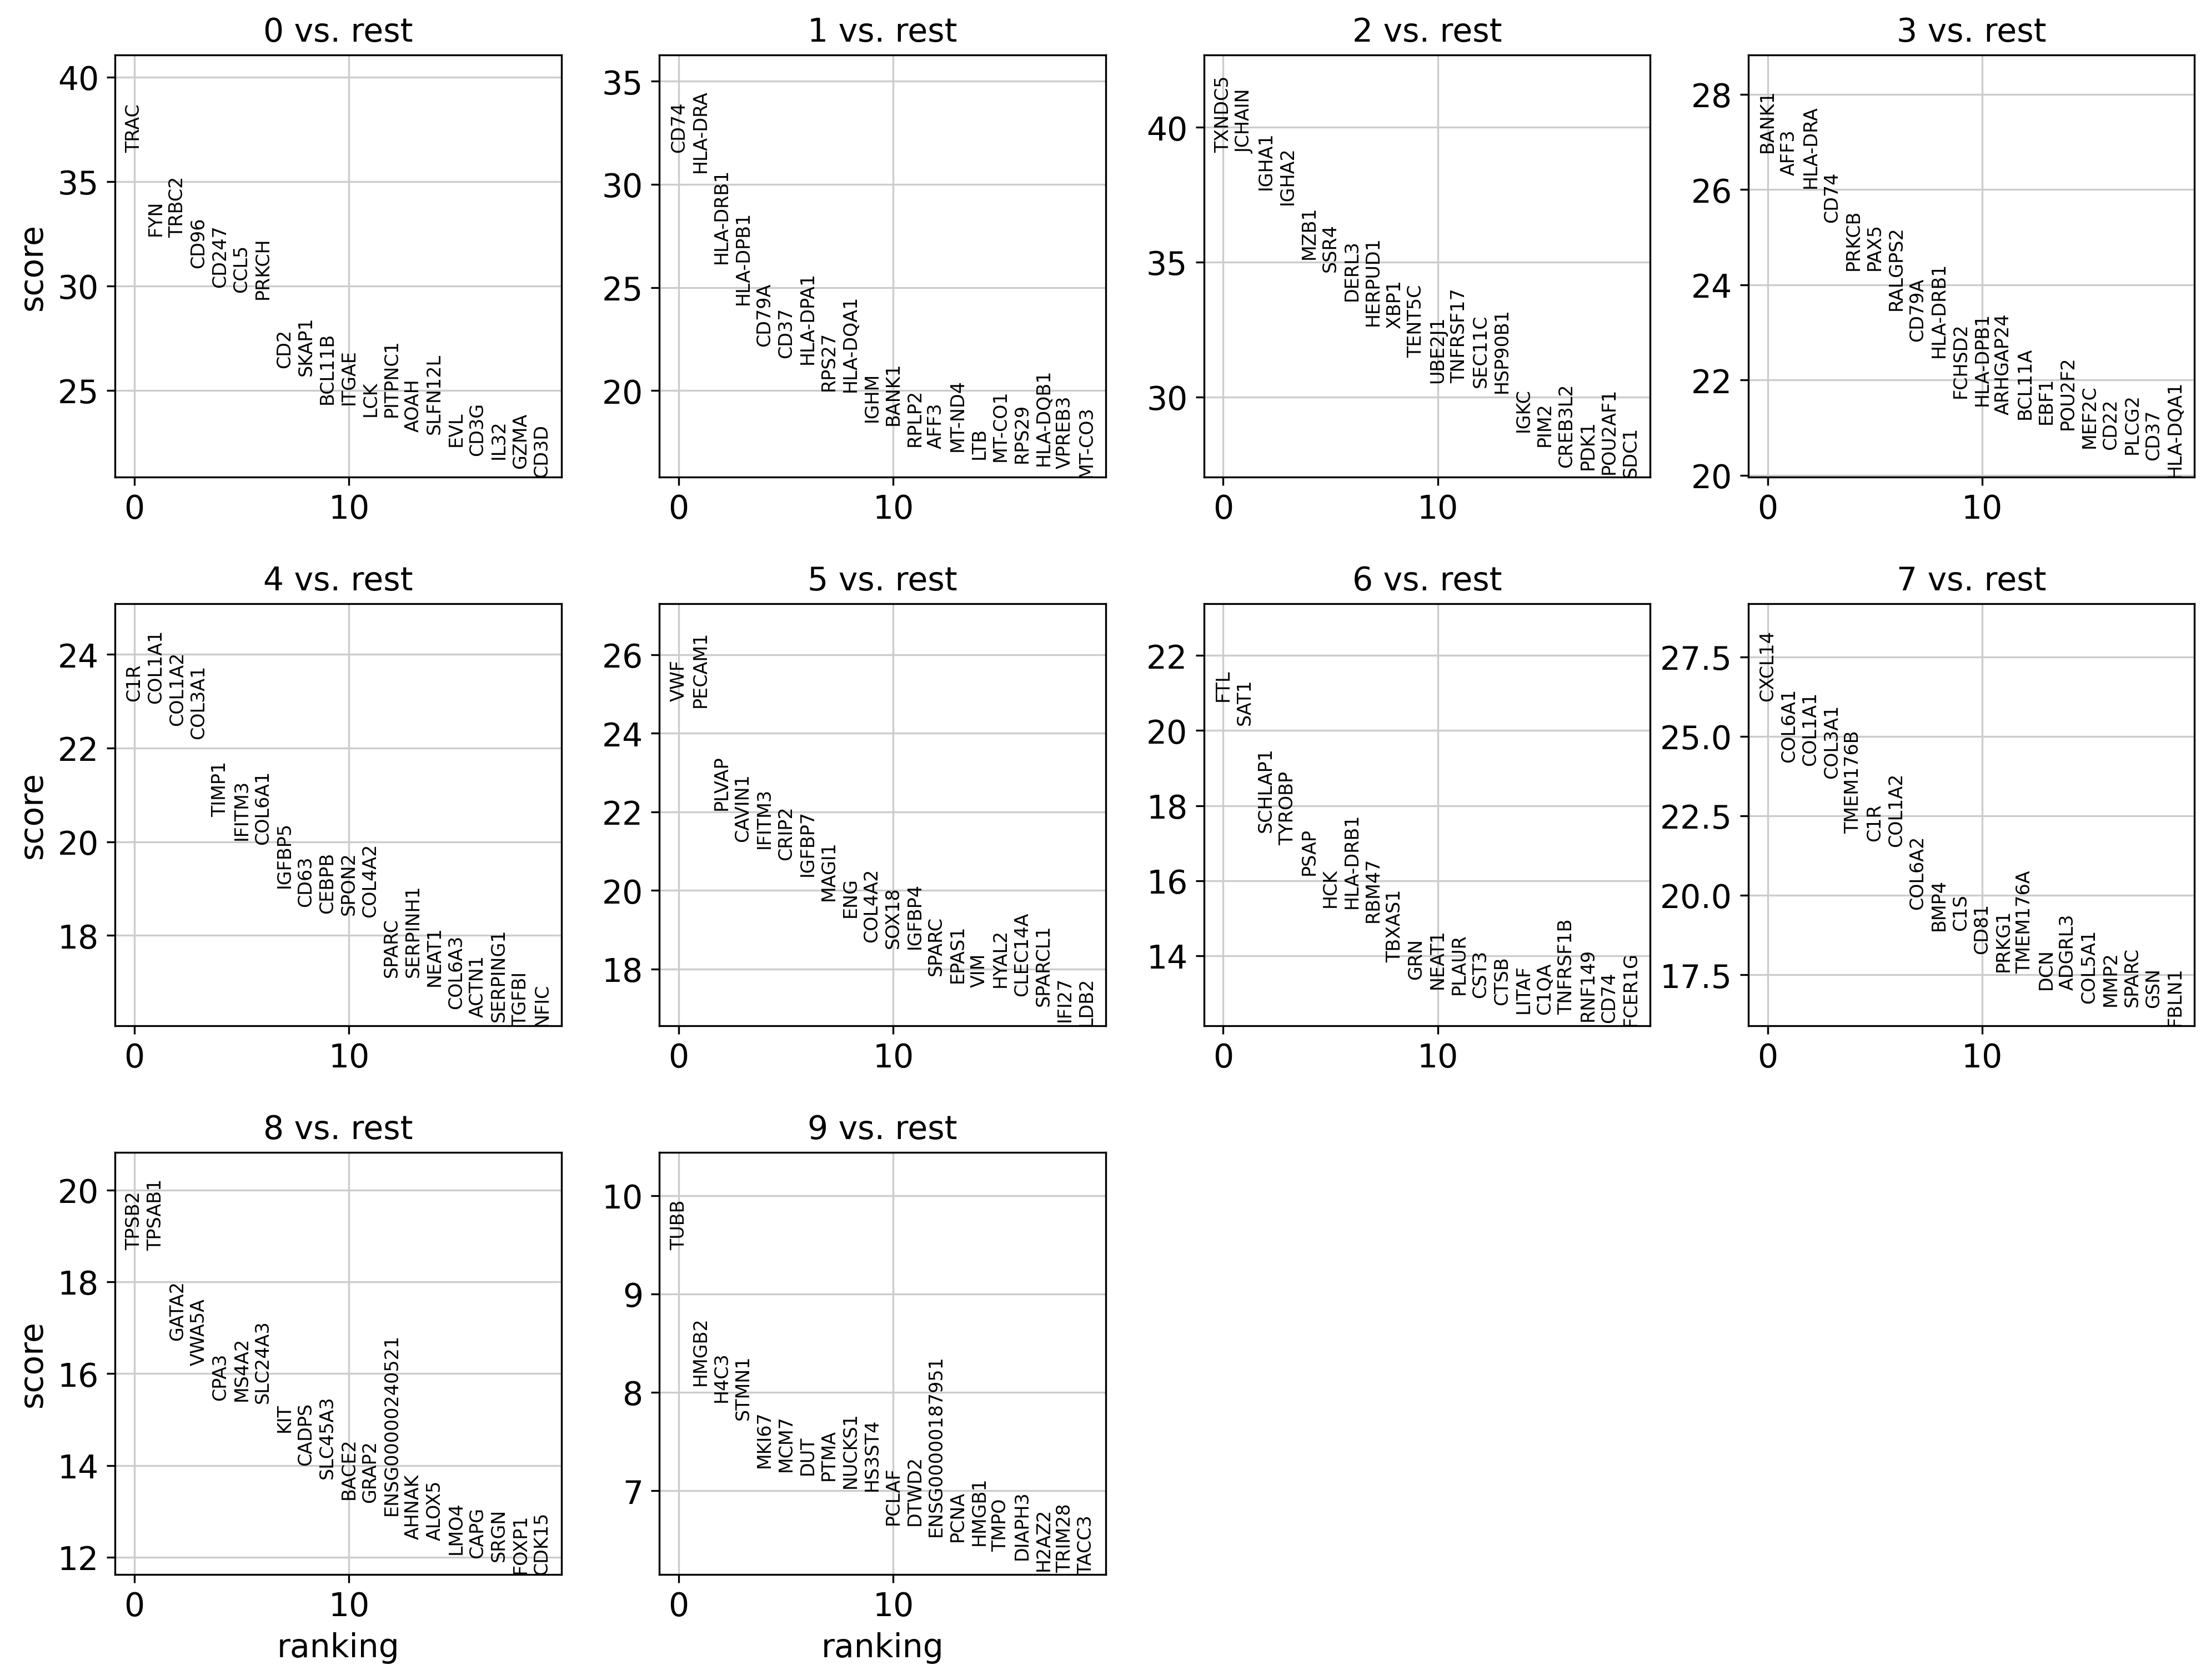

In [20]:
# Run for differential gene expression of each leiden cluster
sc.tl.rank_genes_groups( dat_1_2_new, groupby='leiden', use_raw= False, layer='arcsinh', key_added='leiden_cluster', method= 'wilcoxon' )


sc.pl.rank_genes_groups( dat_1_2_new, key='leiden_cluster', sharey= False )


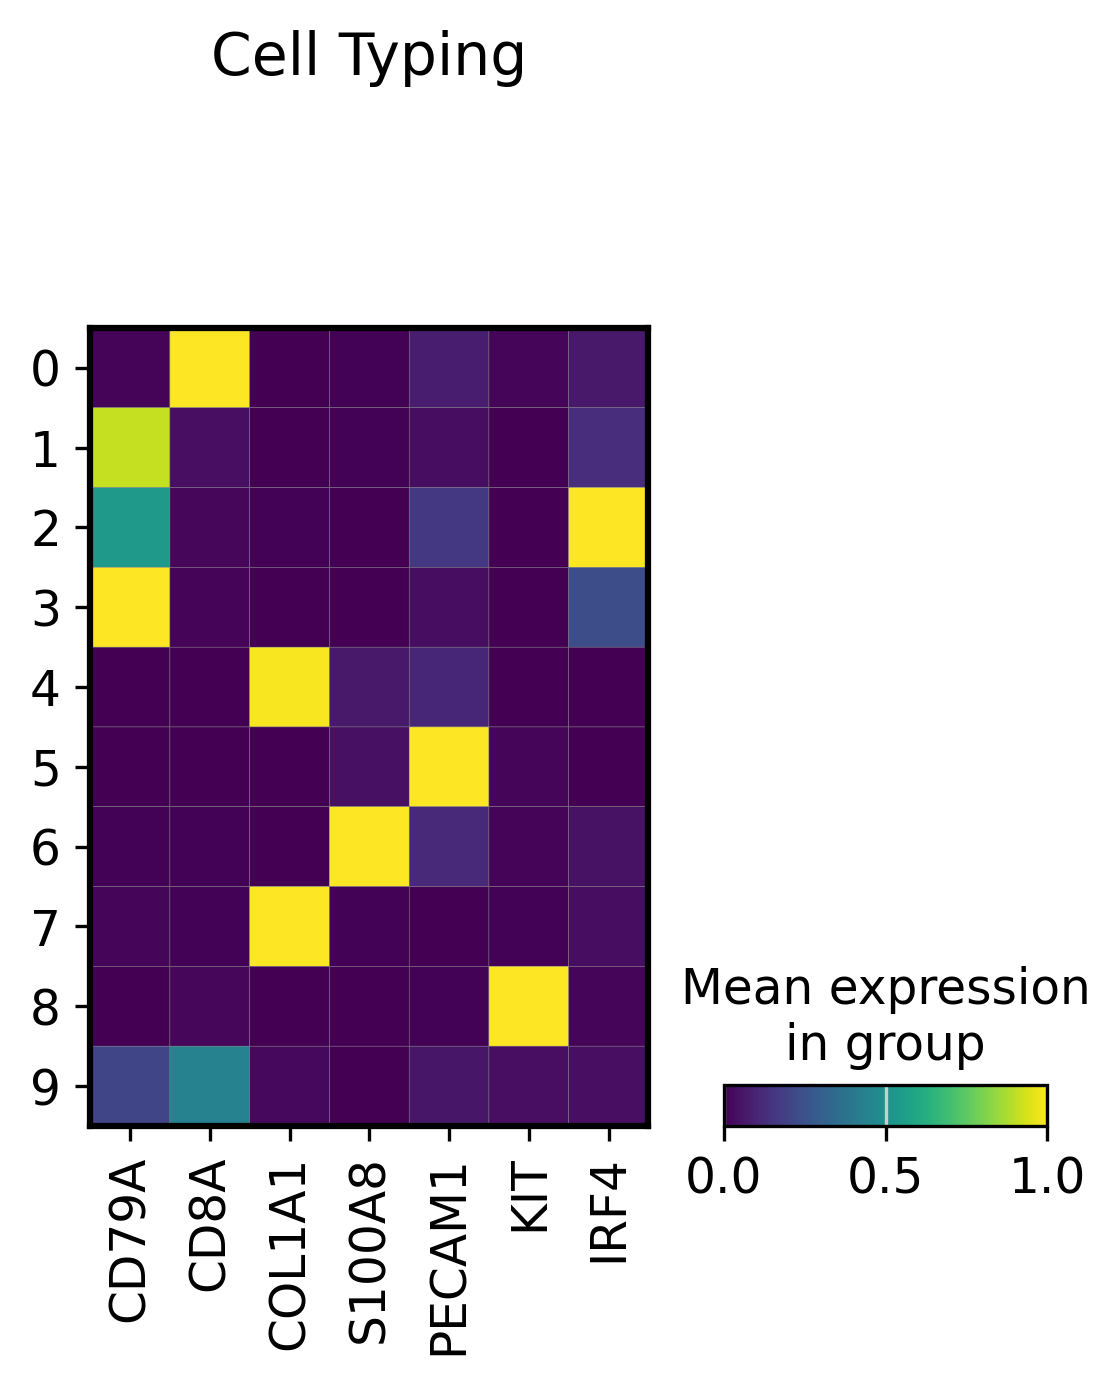

In [21]:

markers = ['CD79A', 'CD8A', 'COL1A1', 'S100A8', 'PECAM1', 'KIT', 'IRF4']

#Attach a matrix plot that includes the genes CD79A, CD8A, COL1A1, S100A8, PECAM1, KIT, and IRF4

sc.pl.matrixplot(dat_1_2_new, var_names = markers, groupby = 'leiden', title = 'Cell Typing', use_raw = False, standard_scale = 'var')


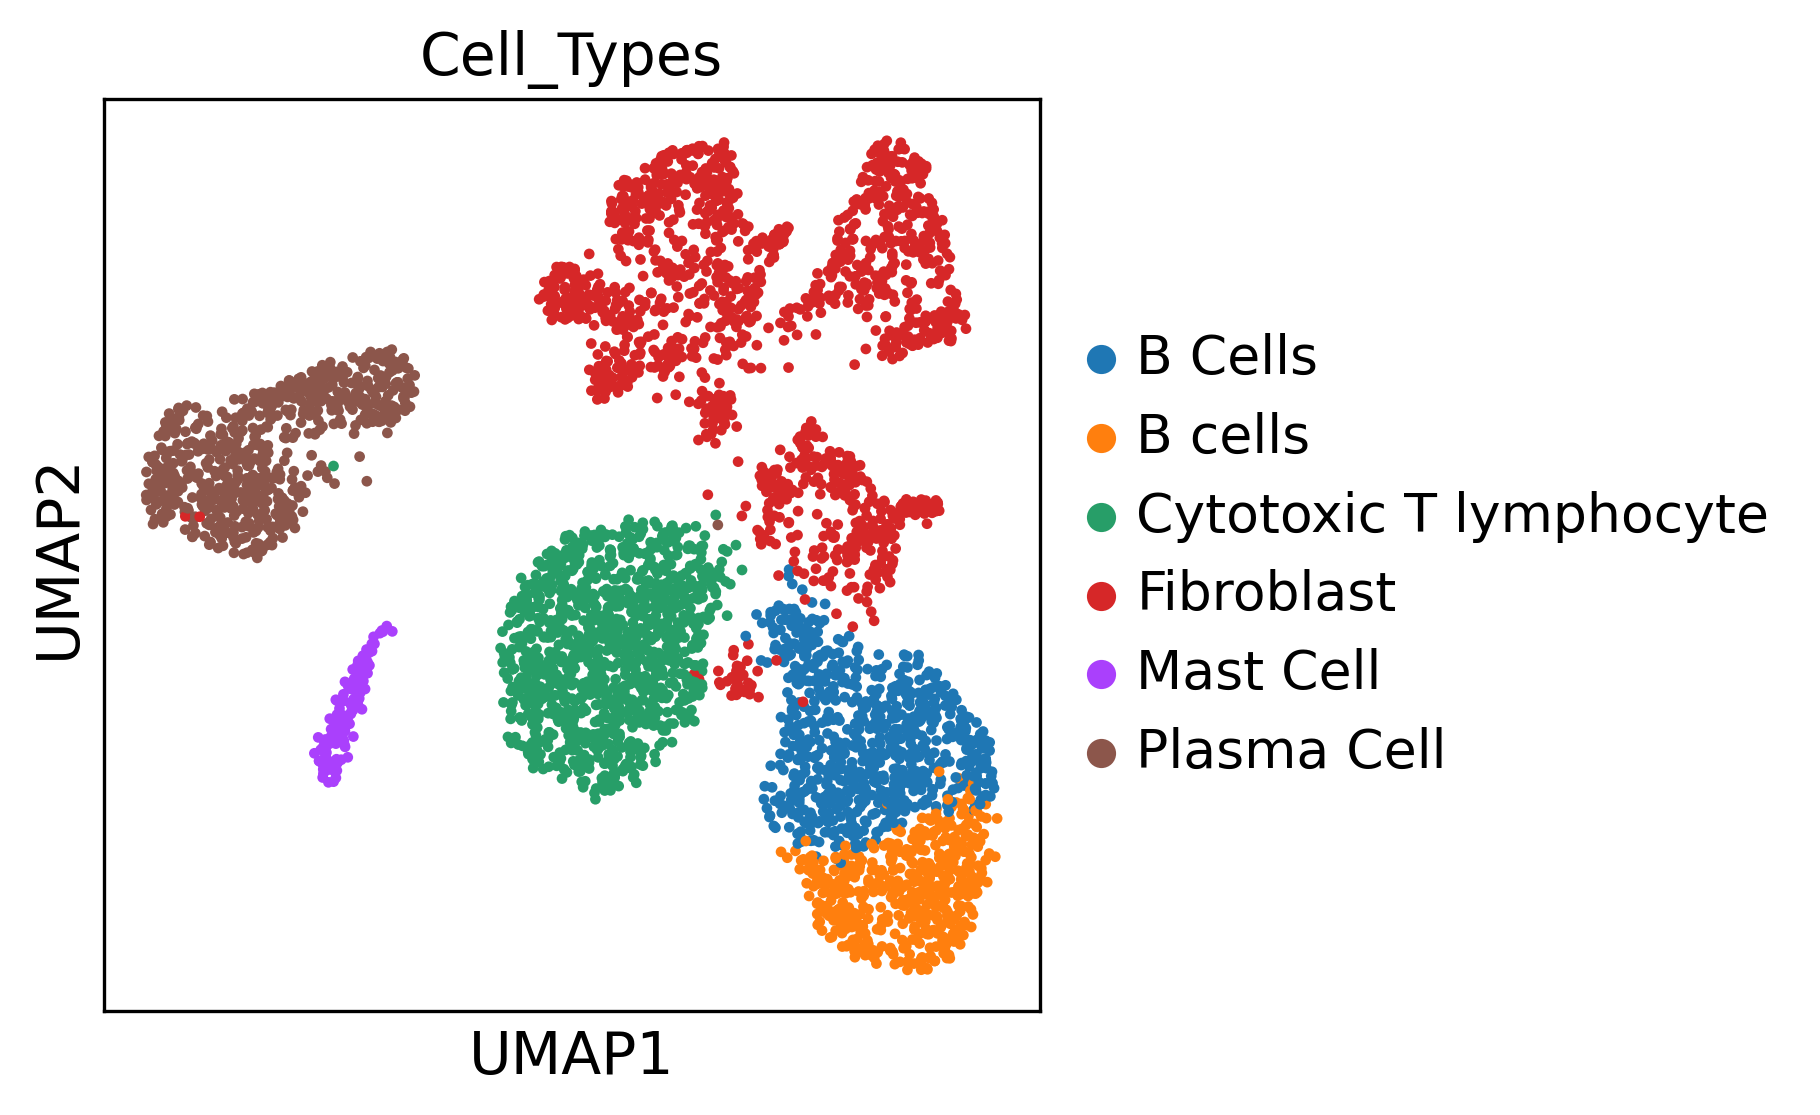

In [26]:
# Add a variable to the anndata object to identify cells

example_celltypes = []
for x in (dat_1_2_new.obs['leiden']):
    if np.isin(x, ['0']):
        example_celltypes.append('Cytotoxic T lymphocyte')
    elif np.isin(x, ['1']):
        example_celltypes.append('B Cells')
    elif x == '3':
        example_celltypes.append('B cells')
    elif np.isin(x, ['2']):
        example_celltypes.append('Plasma Cell')
    elif np.isin(x, ['4']):
        example_celltypes.append('Fibroblast')
    elif np.isin(x, ['8']):
        example_celltypes.append('Mast Cell')
    elif np.isin(x, ['5', '6', '7', '9']):
        example_celltypes.append('Fibroblast')

dat_1_2_new.obs['Cell_Types'] = example_celltypes

sc.pl.umap( dat_1_2_new, color = ['Cell_Types'])

In [ ]:
# Add a variable to the anndata object to identify cells

example_clusters = []
for x in (dat.obs['Cell_Types']):
    if np.isin(x, ['T cells', 'NK cells']):
        example_clusters.append('Cluster 1')
    elif x == 'B cells':
        example_clusters.append('Cluster 2')
    elif np.isin(x, ['Monocytes', 'Dendritic cells']):
        example_clusters.append('Cluster 3')

dat.obs['Clustering_Example'] = example_clusters

# Reading in and initial data processing

In [ ]:
dat = sc.read_h5ad('PBMC_3k_small.h5ad')

In [ ]:
def normalization( dat_ct):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dat_ct)
    dat_ct.X = np.arcsinh(dat_ct.X).copy()
    dat_ct.layers['arcsinh'] = dat_ct.X.copy()
    sc.pp.scale(dat_ct)

    return dat_ct

In [ ]:
dat.raw = dat.copy() # save a raw layer

In [ ]:
dat

AnnData object with n_obs × n_vars = 2625 × 1838
    var: 'gene_ids'

In [ ]:
normalization(dat)

AnnData object with n_obs × n_vars = 2625 × 1838
    var: 'gene_ids', 'mean', 'std'
    layers: 'arcsinh'

In [ ]:
n_neighbors = int( np.sqrt(dat.n_obs) ) # an optimal number for k in KNN

In [ ]:
sc.tl.pca(dat, return_info=False, use_highly_variable = False ) #PCA

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [ ]:
sc.pp.neighbors( dat, n_neighbors= n_neighbors , n_pcs=50, ) # make neighborhood graph

In [ ]:
sc.tl.umap(dat, random_state=0) # make UMAP

In [ ]:
sc.tl.leiden( dat, resolution = 0.7)

<ipython-input-13-9e0c34c5590b>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden( dat, resolution = 0.7)


In [ ]:
dat

AnnData object with n_obs × n_vars = 2625 × 1838
    obs: 'leiden'
    var: 'gene_ids', 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh'
    obsp: 'distances', 'connectivities'

In [ ]:
sc.set_figure_params(figsize=[4,4], dpi = 150)

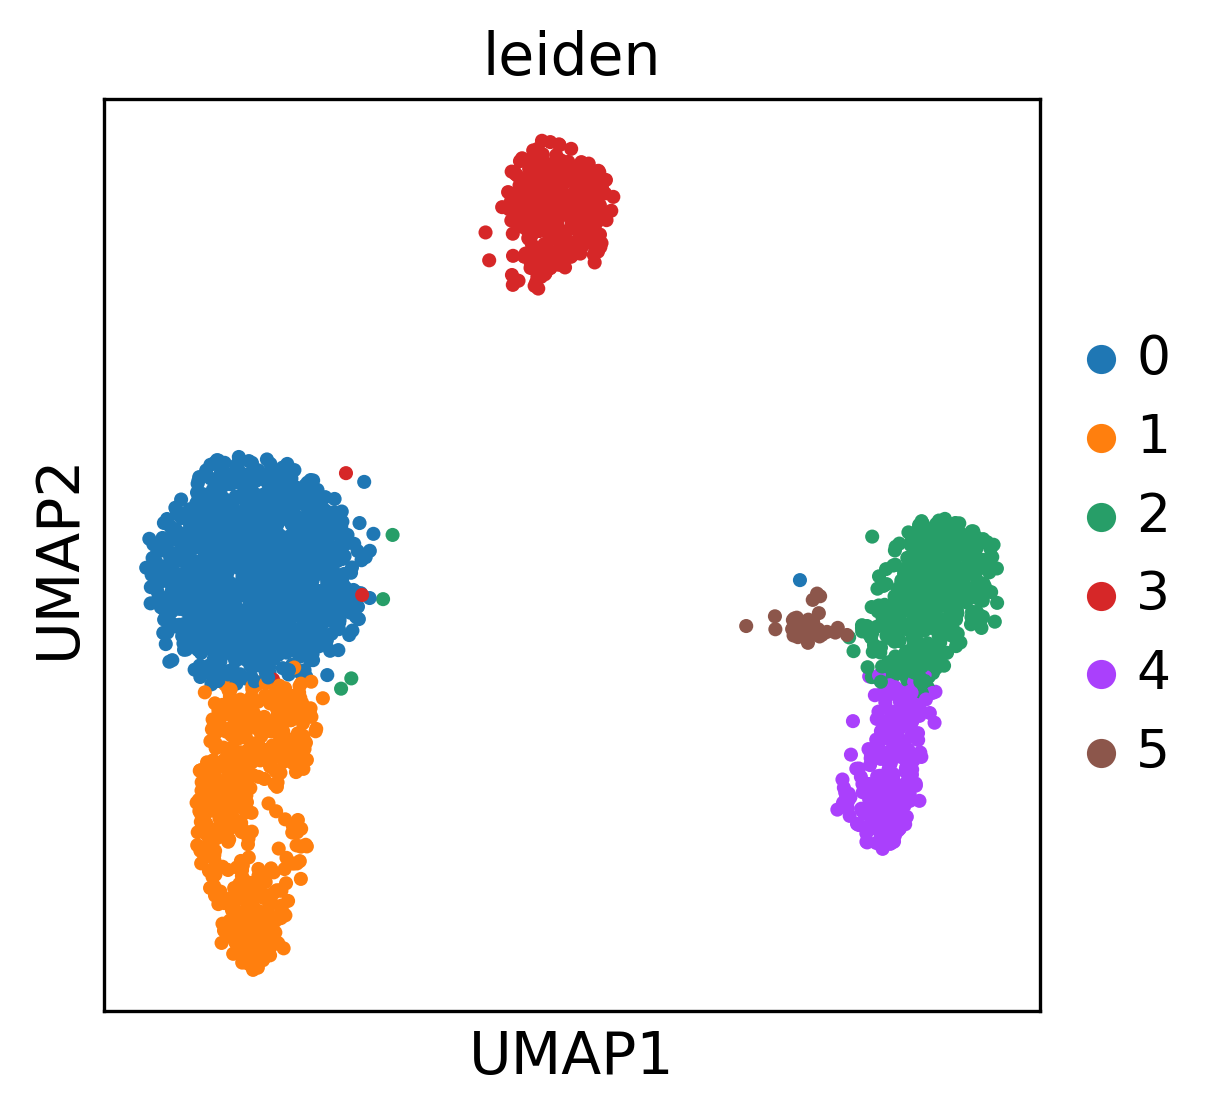

In [ ]:
sc.pl.umap( dat, color = ['leiden'])

# Identifying different cell populations

In [ ]:
# Run for differential gene expression of each leiden cluster
sc.tl.rank_genes_groups( dat, groupby='leiden', use_raw= False, layer='arcsinh', key_added='leiden_cluster', method= 'wilcoxon' )

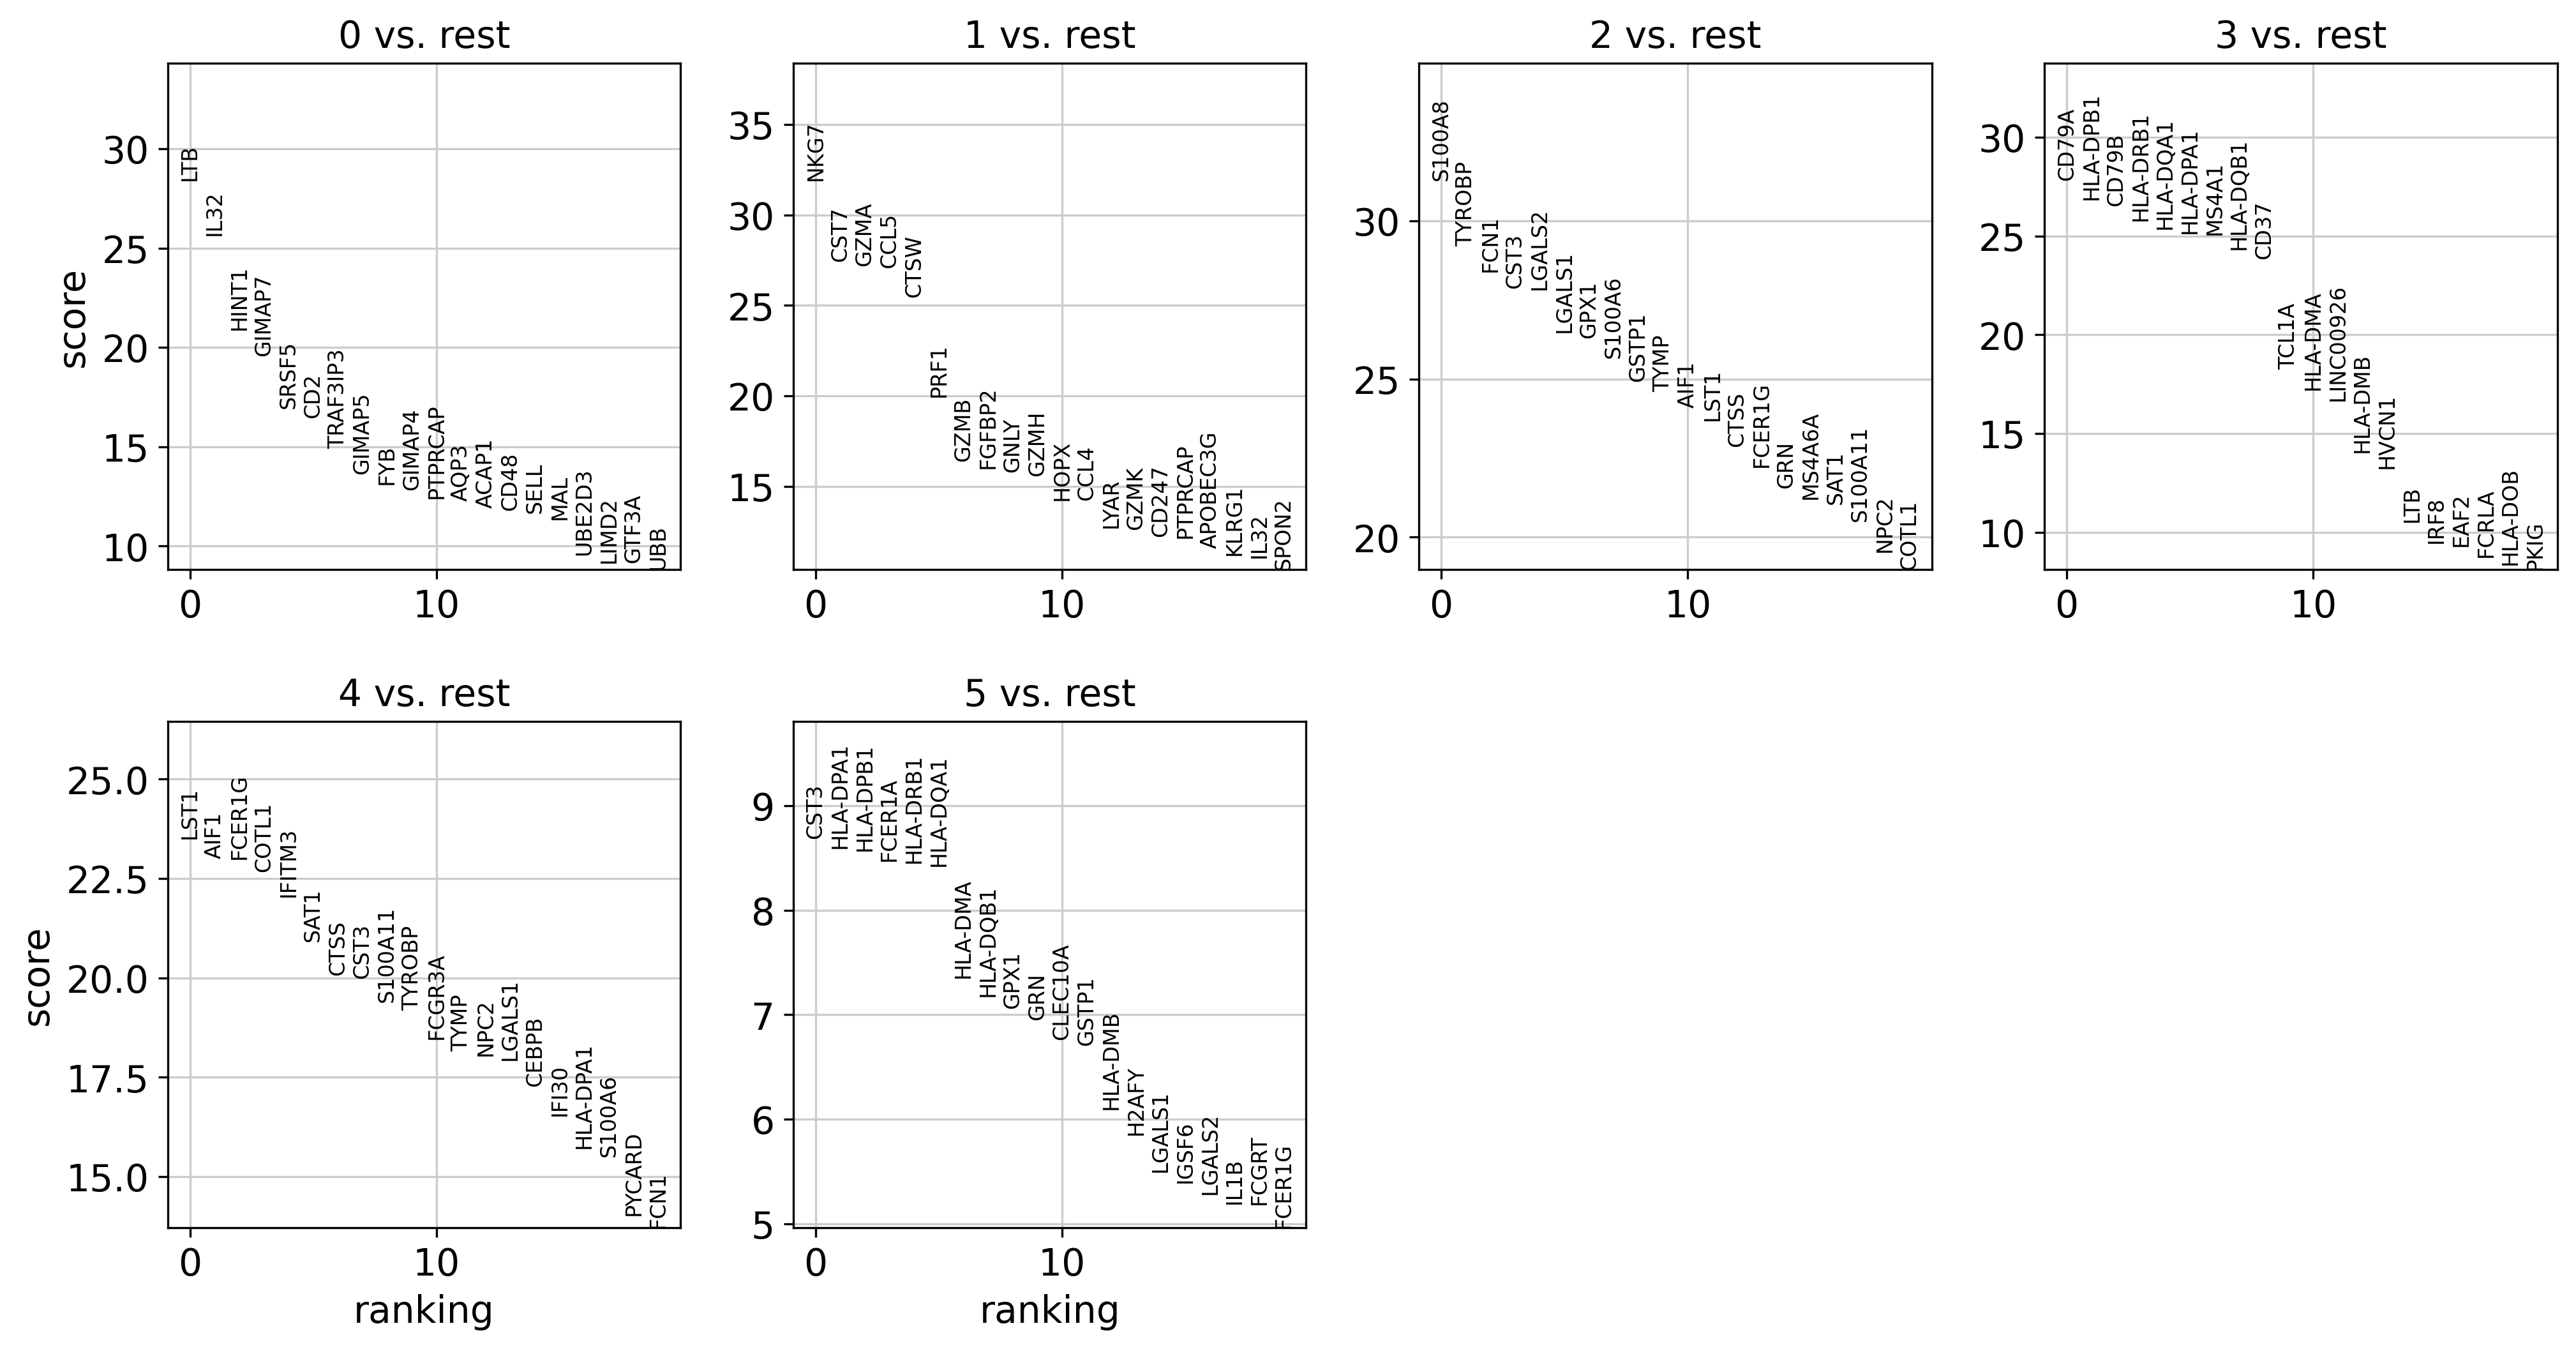

In [ ]:
sc.pl.rank_genes_groups( dat, key='leiden_cluster', sharey= False )

In [ ]:
markers = ['FCGR3A', 'GNLY', 'NKG7', 'CST3', 'PPBP', 'IL32', 'CST7', 'CCL5', 'S100A8', 'CD79A', 'LTB']

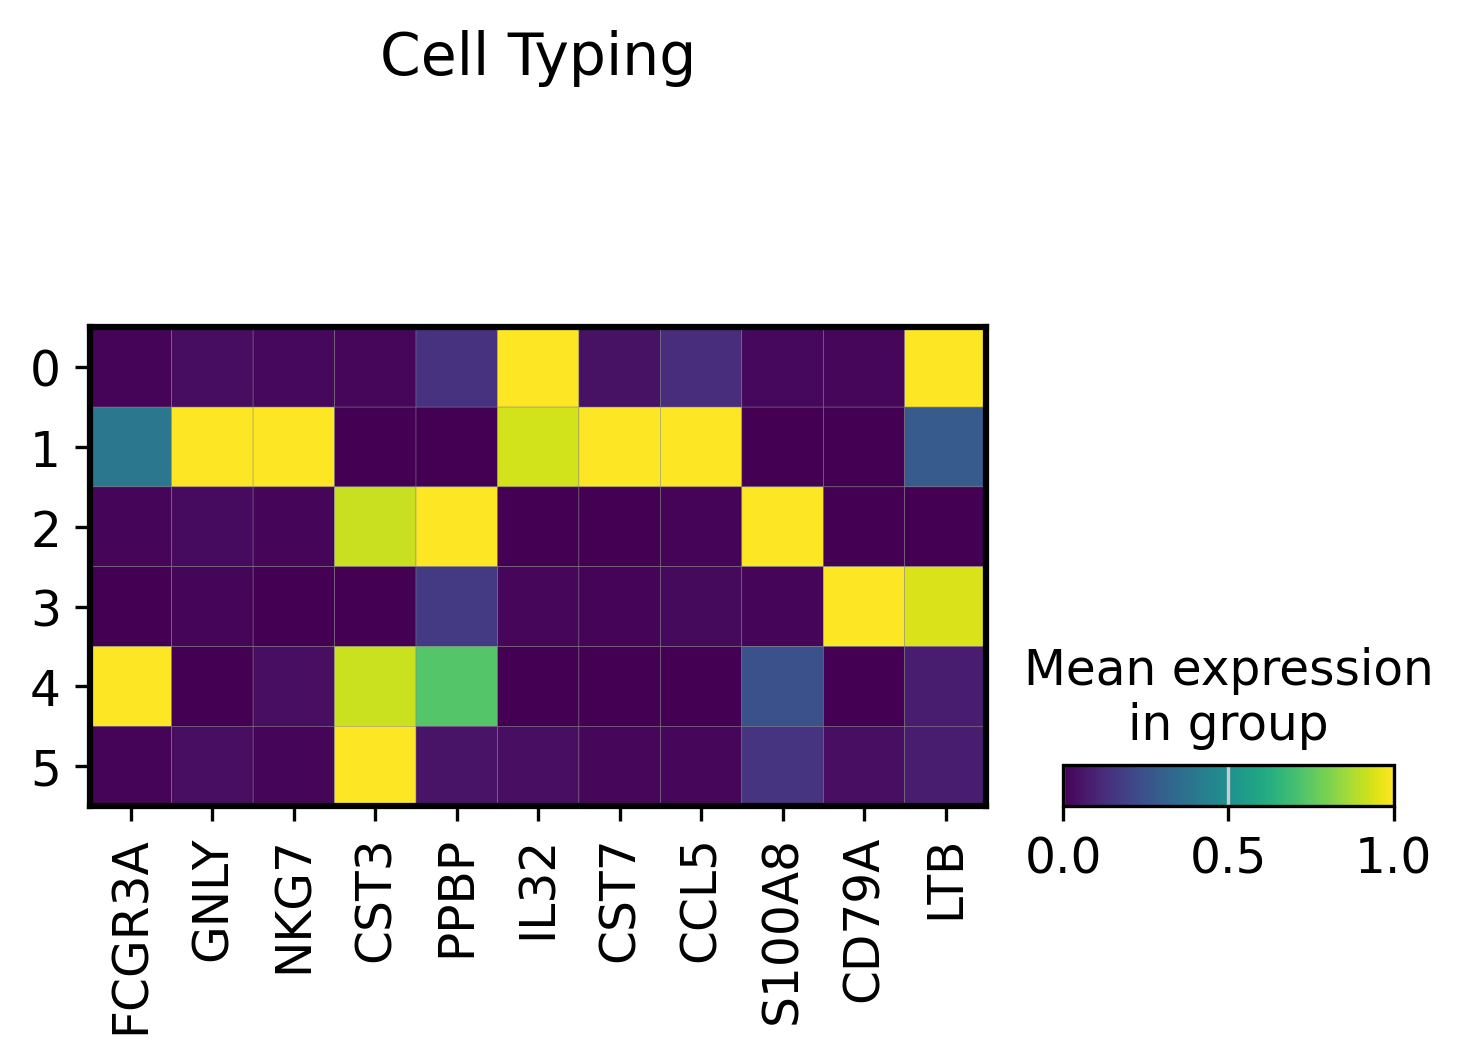

In [ ]:
sc.pl.matrixplot(dat, var_names = markers, groupby = 'leiden', title = 'Cell Typing', use_raw = False, standard_scale = 'var')

In [22]:
# Add a variable to the anndata object to identify cells

example_celltypes = []
for x in (dat.obs['leiden']):
    if np.isin(x, ['0']):
        example_celltypes.append('T cells')
    elif np.isin(x, ['1']):
        example_celltypes.append('NK cells')
    elif x == '3':
        example_celltypes.append('B cells')
    elif np.isin(x, ['2', '4']):
        example_celltypes.append('Monocytes')
    elif x == '5':
        example_celltypes.append('Dendritic cells')

dat.obs['Cell_Types'] = example_celltypes

NameError: name 'dat' is not defined

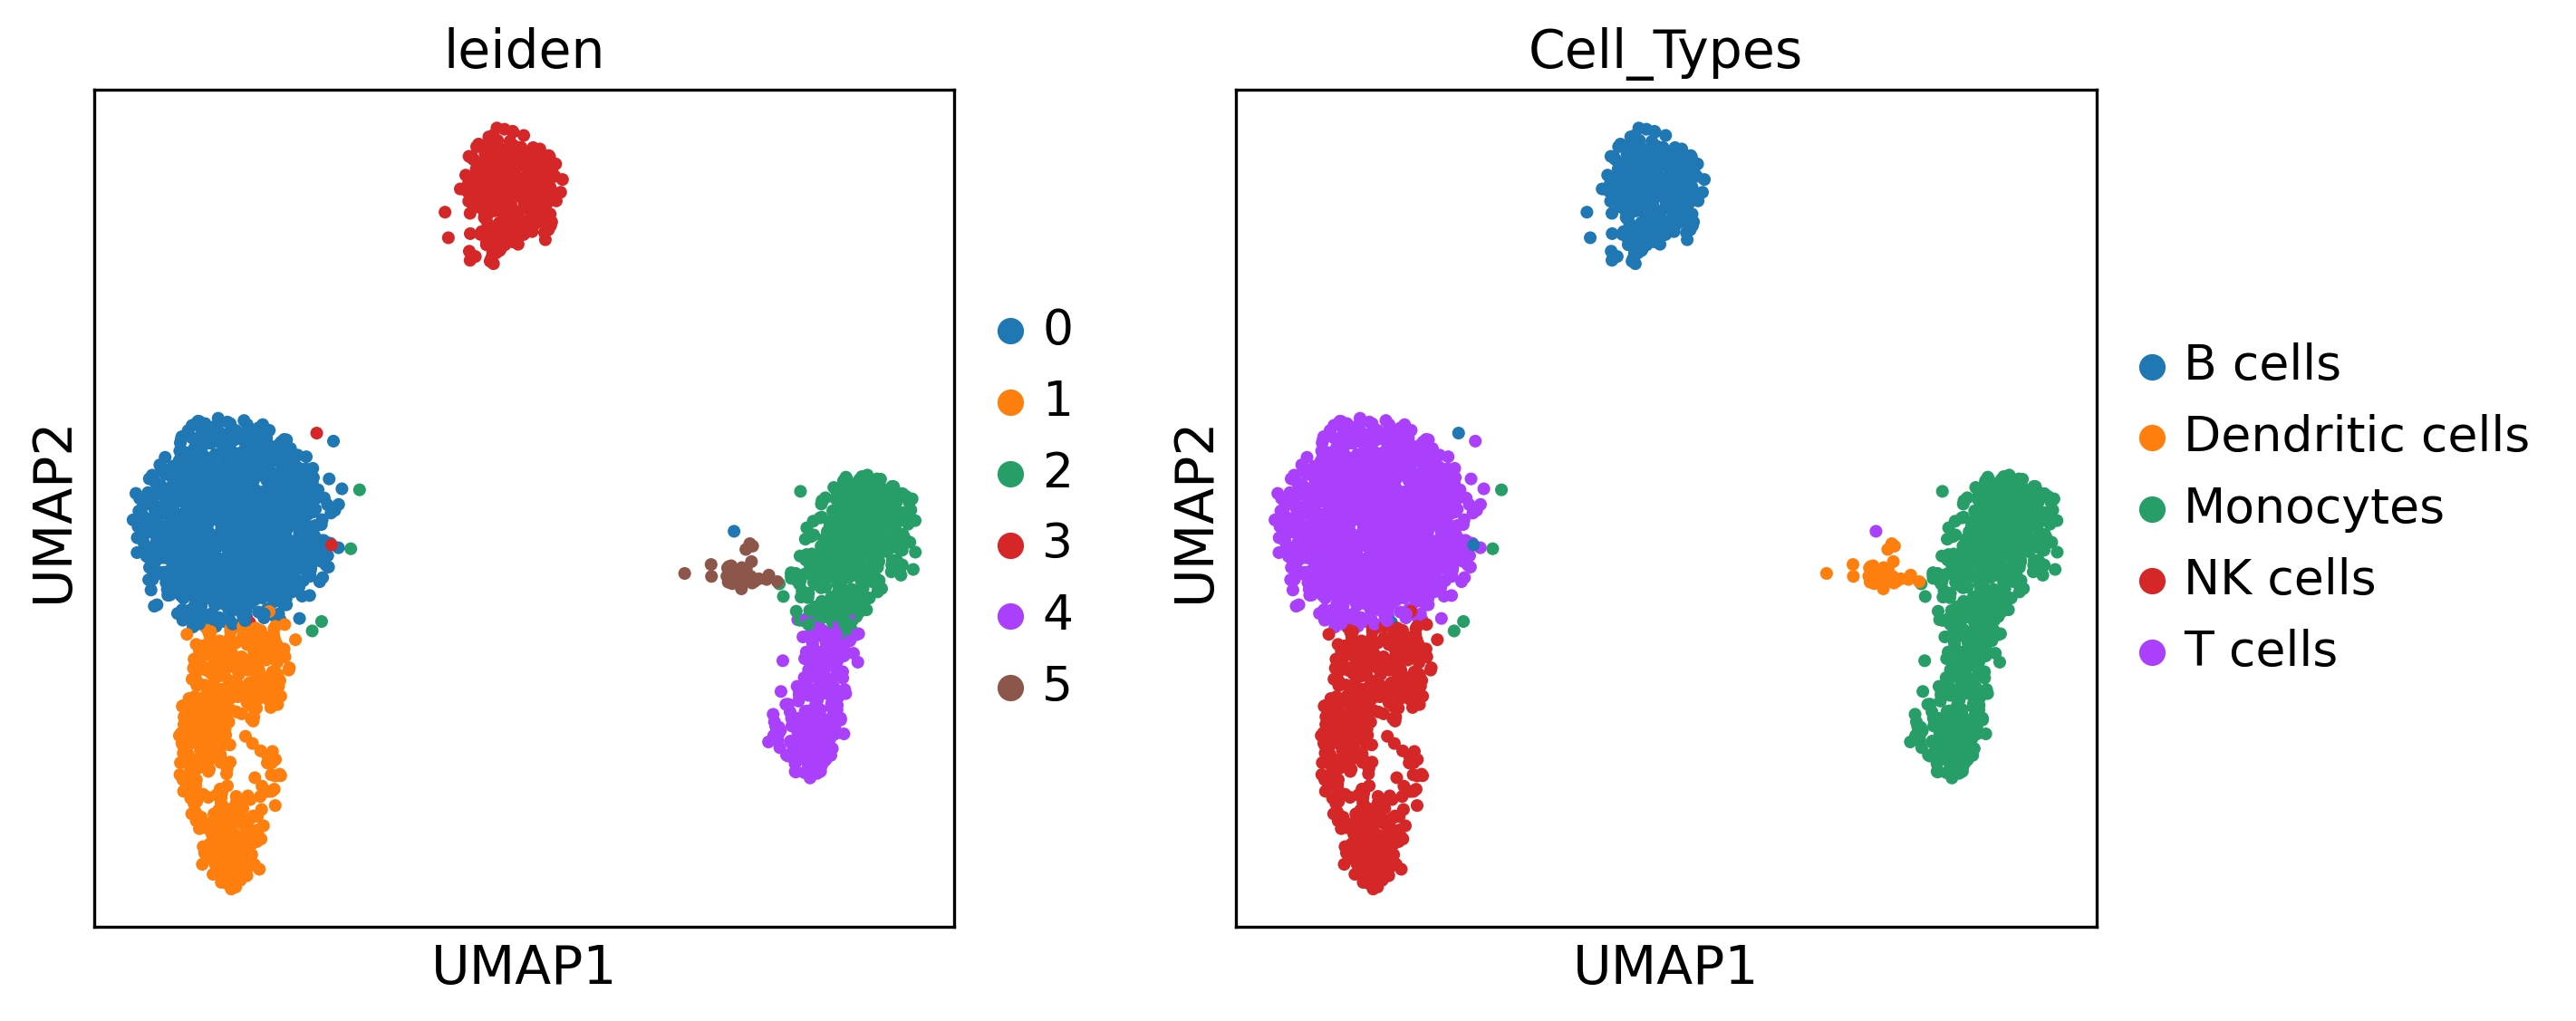

In [ ]:
sc.pl.umap( dat, color = ['leiden', 'Cell_Types'])

In [ ]:
# Add a variable to the anndata object to identify cells

example_clusters = []
for x in (dat.obs['Cell_Types']):
    if np.isin(x, ['T cells', 'NK cells']):
        example_clusters.append('Cluster 1')
    elif x == 'B cells':
        example_clusters.append('Cluster 2')
    elif np.isin(x, ['Monocytes', 'Dendritic cells']):
        example_clusters.append('Cluster 3')

dat.obs['Clustering_Example'] = example_clusters

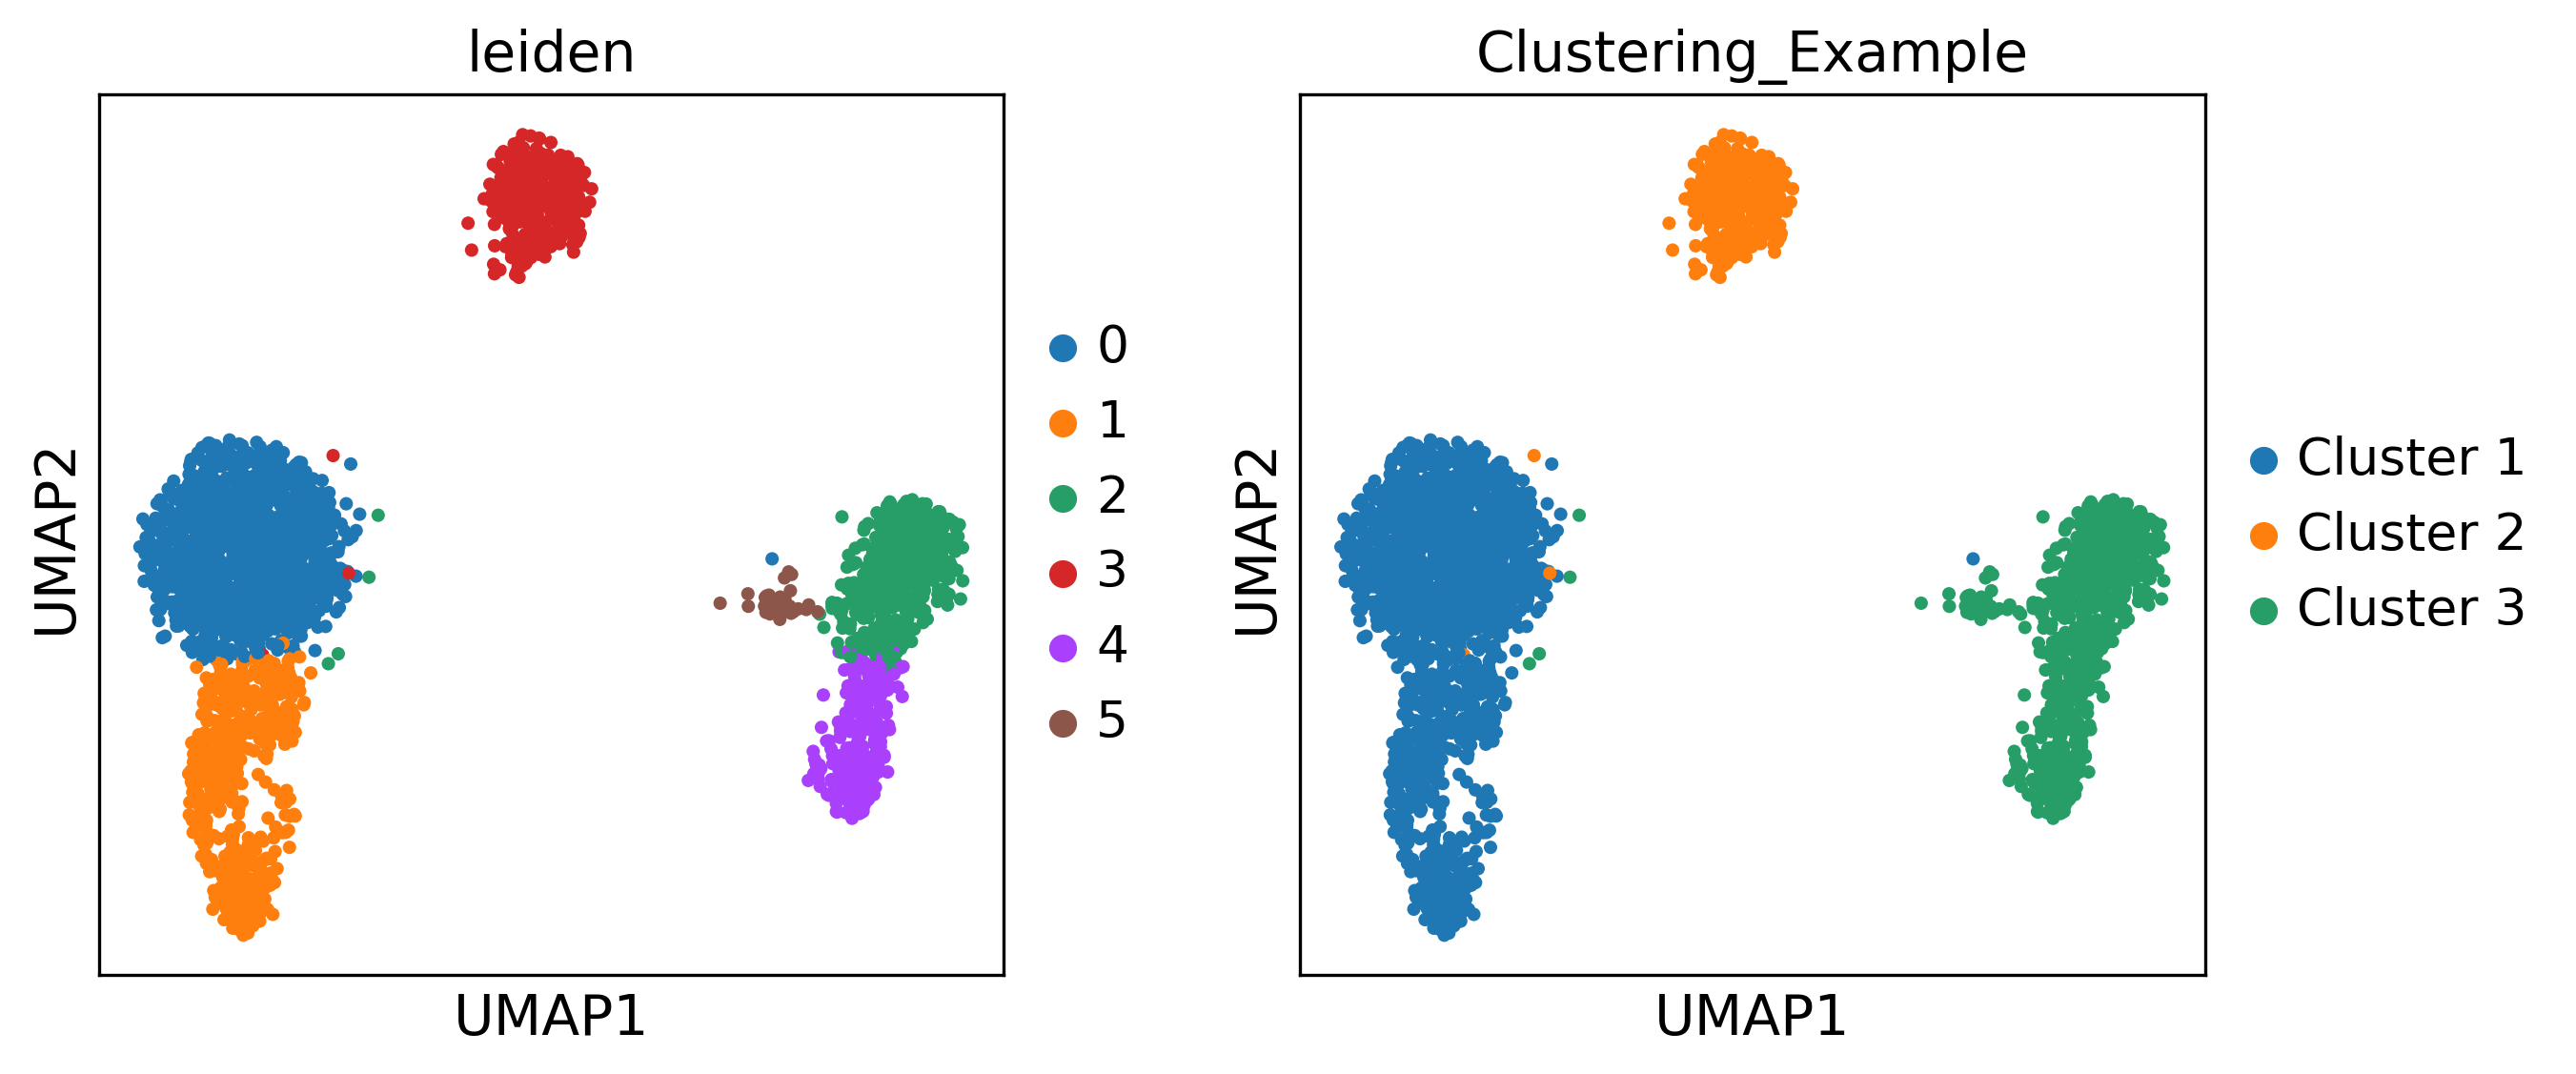

In [ ]:
sc.pl.umap( dat, color = ['leiden', 'Clustering_Example'])

# Integrating Datasets

In [ ]:
#Read in the datasets of interest
dat1 = sc.read('PBMC_3k_small.h5ad')
dat2 = sc.read('GSM3305227_Tumor_1_Full.h5ad')

In [ ]:
dat1

AnnData object with n_obs × n_vars = 2625 × 1838
    var: 'gene_ids'

In [ ]:
dat2

AnnData object with n_obs × n_vars = 1206 × 25507

In [ ]:
#combine anndata objects with inner concat
dat_combo_inner = ad.concat([dat1, dat2], join = 'inner', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [ ]:
dat_combo_inner

AnnData object with n_obs × n_vars = 3831 × 38
    obs: 'Dataset_ID'

In [ ]:
dat_combo_inner.X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#combine anndata objects with outer concat and NaN fill value
dat_combo_outer_NaN = ad.concat([dat1, dat2], join = 'outer', fill_value = 'NaN', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [ ]:
dat_combo_outer_NaN

AnnData object with n_obs × n_vars = 3831 × 27307
    obs: 'Dataset_ID'

In [ ]:
dat_combo_outer_NaN.X

array([['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 4.0, 0.0, ..., 0.0, 1.0, 0.0]], dtype=object)

In [ ]:
#combine anndata objects with outer concat and 0 fill value
dat_combo_outer = ad.concat([dat1, dat2], join = 'outer', fill_value = '0', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [ ]:
dat_combo_outer

AnnData object with n_obs × n_vars = 3831 × 27307
    obs: 'Dataset_ID'

In [ ]:
dat_combo_outer.X

array([['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 4.0, 0.0, ..., 0.0, 1.0, 0.0]], dtype=object)